# Return of the Notebook

Erhobene Daten können meist am einfachsten im Notebook analysiert werden.
Oftmals sind unsere Daten in Tabellenform vorhanden. In diesem Falle bietet
sich das `Pandas`-Paket an.

In [2]:
%matplotlib inline

import pandas as pd  # pandas zur Arbeit mit "Dataframes" - also Daten in Tabellen
import numpy as np
import seaborn as sns  # für bequeme Visualisierung

In [3]:
fname = "./all_res_class_contextvals.csv"  # richtigen Namen einsetzen ...
df = pd.read_csv(fname)  # einladen einer CSV-Datei; siehe auch `pd.read_csv?`

In `df` sind jetzt die Daten als Dataframe gespeichert. Mit der `head`-method von Dataframes können nur die ersten Zeilen angezeigt werden - man sieht das Spalten/Zeilen-Layout -, und mit `describe` eine Zusammenfassung der numerischen Einträge:

In [4]:
df.head()

,Unnamed: 0,trial_id,word,correct_key,button,rt,subj,freqs,sims
0,0,0,pinguin,l,l,0.415723,0,2.32,0.000000
1,1,1,goldfisch,l,l,0.487444,0,1.97,0.179393
2,2,2,lama,l,l,0.533625,0,4.09,0.004789
3,3,3,orchidee,l,l,0.470491,0,2.13,0.088054
4,4,4,scotch,l,l,0.459900,0,9.37,0.026734


In [5]:
df.describe()

,Unnamed: 0,trial_id,rt,subj,freqs,sims
count,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000,3431.000000
mean,1715.000000,214.330516,14.477590,3.453512,36.023862,0.078300
std,990.588714,124.491005,117.289396,2.264077,167.260922,0.152236
min,0.000000,0.000000,0.300057,0.000000,0.000000,-0.132483
25%,857.500000,107.000000,0.428454,1.000000,0.910000,-0.009374
50%,1715.000000,214.000000,0.490530,3.000000,3.500000,0.028010
75%,2572.500000,321.000000,0.563579,5.000000,12.010000,0.102908
max,3430.000000,453.000000,999.000000,7.000000,1458.480000,1.000000


Die Spalten eines Dataframes können wie die Einträge von dicts aufgerufen werden. Dies resultiert in einer `pandas.Series`, einer indizierten Liste. Z.b. können wir auf den "rt"-Eintrag, also hier die Reaktionszeiten, zugreifen.

In [6]:
df["rt"]

0       0.415723
1       0.487444
2       0.533625
3       0.470491
4       0.459900
5       0.464433
6       0.499804
7       0.446707
8       0.410699
9       0.632099
10      0.540468
11      0.517968
12      0.529165
13      0.544372
14      0.518079
15      0.444693
16      0.521750
17      0.492606
18      0.443727
19      0.619597
20      0.479782
21      0.533660
22      0.438538
23      0.482328
24      0.482386
25      0.527686
26      0.593242
27      0.436570
28      0.645483
29      0.480192
          ...   
3401    0.499025
3402    0.524039
3403    0.480117
3404    0.518131
3405    0.521257
3406    0.544721
3407    0.522267
3408    0.489172
3409    0.517643
3410    0.561087
3411    0.586125
3412    0.611901
3413    0.670935
3414    0.547390
3415    0.587867
3416    0.534694
3417    0.581013
3418    0.677997
3419    0.519916
3420    0.519635
3421    0.496012
3422    0.495662
3423    0.601610
3424    0.444621
3425    0.522314
3426    0.522300
3427    0.453684
3428    0.5196

Sie können in diese Series-Objekte indizieren wie in Listen.

In [7]:
df["rt"][10]

0.540467977524

In [8]:
df["rt"][:10]

0    0.415723
1    0.487444
2    0.533625
3    0.470491
4    0.459900
5    0.464433
6    0.499804
7    0.446707
8    0.410699
9    0.632099
Name: rt, dtype: float64

In [9]:
df["rt"][10:15]

10    0.540468
11    0.517968
12    0.529165
13    0.544372
14    0.518079
Name: rt, dtype: float64

Pandas stellt bereits Visualisierungsmethoden vor, etwa als methods auf den Dataframe- bzw. Series-Objekten.

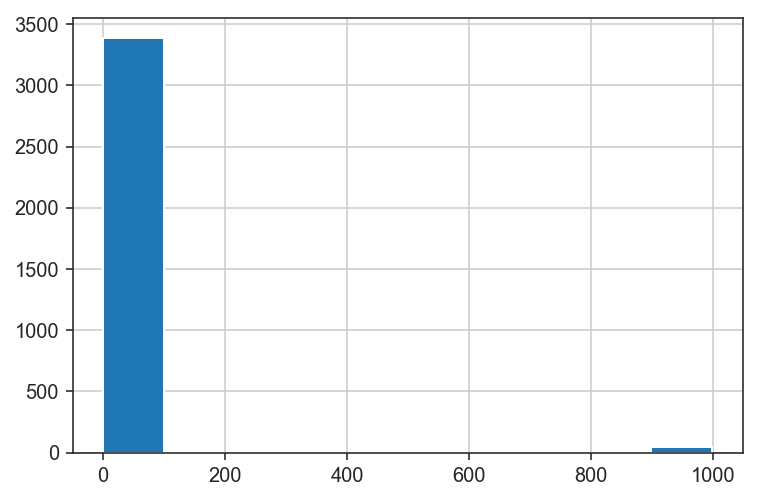

In [10]:
df["rt"].hist()

Aha! Es gibt einige Outlier. Fehlende Reaktionszeiten (zu spät) sind mit "999" kodiert. Wir können mit der `max`-method den höchsten Wert und mit der `query`-method ein Subset des Dataframes anzeigen lassen.

In [11]:
df["rt"].max()

999.0

In [12]:
df_cleaned = df.query("rt < 10")  # nur die RTs unter 10
df_cleaned.describe()

,Unnamed: 0,trial_id,rt,subj,freqs,sims
count,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000
mean,1709.997931,214.426840,0.508606,3.441915,35.778093,0.078641
std,993.347523,124.532576,0.120306,2.271122,166.527549,0.152460
min,0.000000,0.000000,0.300057,0.000000,0.000000,-0.132483
25%,848.500000,106.000000,0.427950,1.000000,0.870000,-0.009267
50%,1705.000000,215.000000,0.488761,3.000000,3.500000,0.028056
75%,2575.500000,321.000000,0.559434,5.000000,12.010000,0.103403
max,3430.000000,453.000000,1.016465,7.000000,1458.480000,1.000000


Jetzt können wir noch einmal die Reaktionszeiten anschauen ...

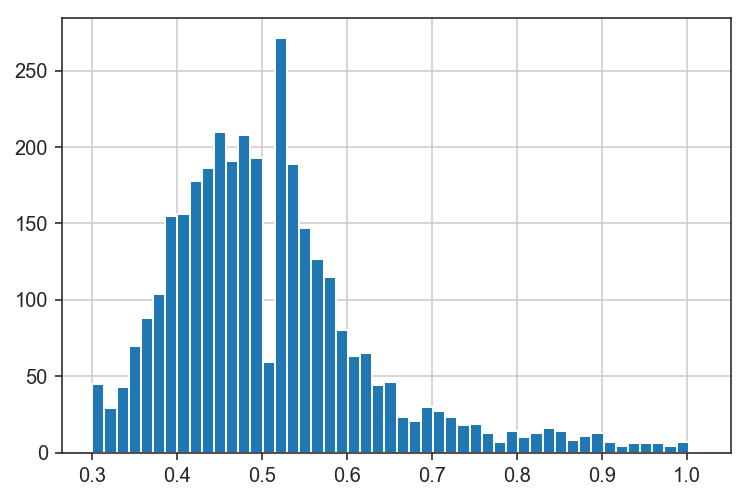

In [13]:
df.query("rt < 10")["rt"].hist(bins=50)

Oder ausführlicher:

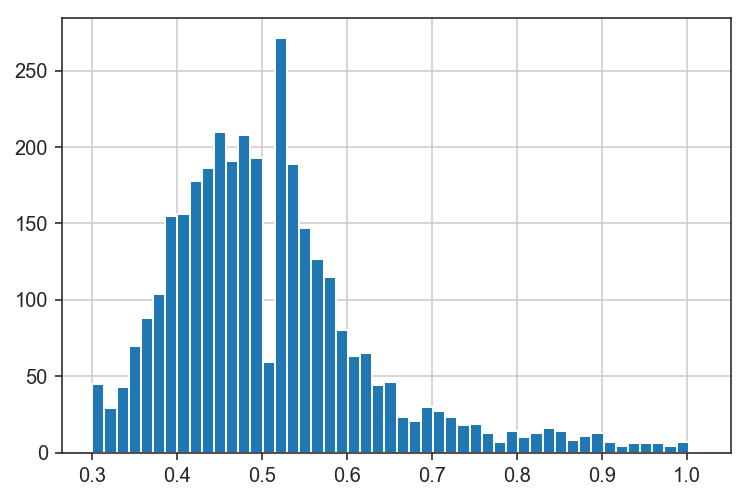

In [14]:
df_cleaned = df.query("rt < 10").copy()  # Achtung: das .copy() ist wichtig, da `query` eine "view" ausgibt.
rts = df_cleaned["rt"]
rts.hist(bins=50)

Eine Alternative zur `query`-method ist, direkt in den Index des Dataframes zu indizieren.

In [15]:
df[df["rt"] < 99].head()

,Unnamed: 0,trial_id,word,correct_key,button,rt,subj,freqs,sims
0,0,0,pinguin,l,l,0.415723,0,2.32,0.000000
1,1,1,goldfisch,l,l,0.487444,0,1.97,0.179393
2,2,2,lama,l,l,0.533625,0,4.09,0.004789
3,3,3,orchidee,l,l,0.470491,0,2.13,0.088054
4,4,4,scotch,l,l,0.459900,0,9.37,0.026734


Hierbei ist `df["rt"] < 99` eine Series von `True` und `False` (`True` nur dort, Wo die Reaktionszeit unter 99 liegt), die als Index für den Dataframe verwendet wird. Dort, wo der Index `True` ist, wird die Zeile ausgegeben, sonst nicht.

In [16]:
(df["rt"] < 99)[:10]  # nur die ersten 10 Einträge

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: rt, dtype: bool

Allgemein können immer Listen (gleicher Länge) voller `True` und `False` als Index benutzt werden.

In [17]:
slowRTs = df[[rt > .5 for rt in df["rt"]]]  # nur RTs über .5 Sekunden
slowRTs["rt"].mean()

30.86118645572053

Neben `max` bietet Pandas auch die meiste deskriptive Statistik an:

In [18]:
df["rt"].max(), df_cleaned["rt"].max()

(999.0, 1.01646518707)

In [19]:
df["rt"].mean(), df_cleaned["rt"].mean()

(14.477590467203989, 0.5086056438004375)

In [20]:
df["rt"].median(), df_cleaned["rt"].median()

(0.490530014038, 0.488760966982)

In [21]:
df.query("rt < 99")["rt"].median()

0.488760966982

Series (Spalten eines Dataframes) verhalten sich in vielerlei Hinsicht wie Listen. Z.b. können wir über sie iterieren (bzw. list comprehensions verwenden).

In [22]:
[rt for rt in df["rt"] if rt < 99]

[0.415723085403,
 0.48744392395,
 0.533624887466,
 0.470491170883,
 0.459900140762,
 0.464433193207,
 0.499804019928,
 0.446707010269,
 0.410698890686,
 0.632098913193,
 0.540467977524,
 0.517967939377,
 0.529164791107,
 0.544371843338,
 0.518079042435,
 0.444692850113,
 0.521749973297,
 0.492606163025,
 0.443727016449,
 0.61959695816,
 0.479782104492,
 0.533659934998,
 0.438537836075,
 0.48232793808,
 0.482385873795,
 0.52768611908,
 0.593241930008,
 0.436569929123,
 0.645483016968,
 0.48019194603,
 0.550346136093,
 0.4505100250240001,
 0.474572896957,
 0.581449985504,
 0.55405497551,
 0.459193944931,
 0.478338956833,
 0.544070005417,
 0.469752073288,
 0.528548002243,
 0.54284286499,
 0.5306458473210001,
 0.483906984329,
 0.517712116241,
 0.633472919464,
 0.498528957367,
 0.492763996124,
 0.575531005859,
 0.518158912659,
 0.698943138123,
 0.553560972214,
 0.5393331050869999,
 0.517978906631,
 0.518111944199,
 0.524885892868,
 0.57698392868,
 0.568692922592,
 0.486585140228,
 0.4436569

In [23]:
np.median([rt for rt in df["rt"] if rt < 99])

0.488760966982

Und sie haben eine Länge.

In [24]:
len(df.query("rt > 10"))

48

In [25]:
len(df)

3431

Neue Spalten legen wir an wie Einträge in dicts. Wir können sie mit einer einzelnen Zahl initialisieren:

In [26]:
df_cleaned["log_rt"] = 0

In [27]:
df_cleaned.head()

,Unnamed: 0,trial_id,word,correct_key,button,rt,subj,freqs,sims,log_rt
0,0,0,pinguin,l,l,0.415723,0,2.32,0.000000,0
1,1,1,goldfisch,l,l,0.487444,0,1.97,0.179393,0
2,2,2,lama,l,l,0.533625,0,4.09,0.004789,0
3,3,3,orchidee,l,l,0.470491,0,2.13,0.088054,0
4,4,4,scotch,l,l,0.459900,0,9.37,0.026734,0


Wir können diese Spalte jetzt mit Zahlen fühllen, oder hätten sie gleich so initialisieren können.

In [28]:
rt = df_cleaned["rt"]
df_cleaned["log_rt"] = np.log(rt)

Äquivalent:

In [29]:
df_cleaned["log_rt"] = np.log(df_cleaned["rt"])

Die logtransformierten RTs sehen eher normalverteilt aus ...

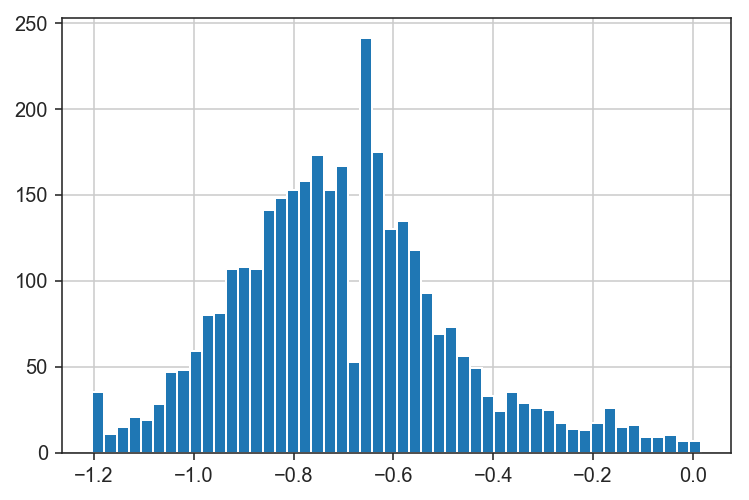

In [30]:
df_cleaned["log_rt"].hist(bins=50)

Wir können auch neue Spalten erstellen, indem wir Stück für Stück eine neue Liste aufbauen und sie dann in das Dataframe schreiben.

In [31]:
length = []

for word in df_cleaned["word"]:
    wordlen = len(word)  # Länge des Wortes in Buchstaben
    length.append(wordlen)

df_cleaned["length"] = length

In [32]:
# äquivalent zu oben
df_cleaned["length"] = [len(wort) for wort in df_cleaned["word"]]

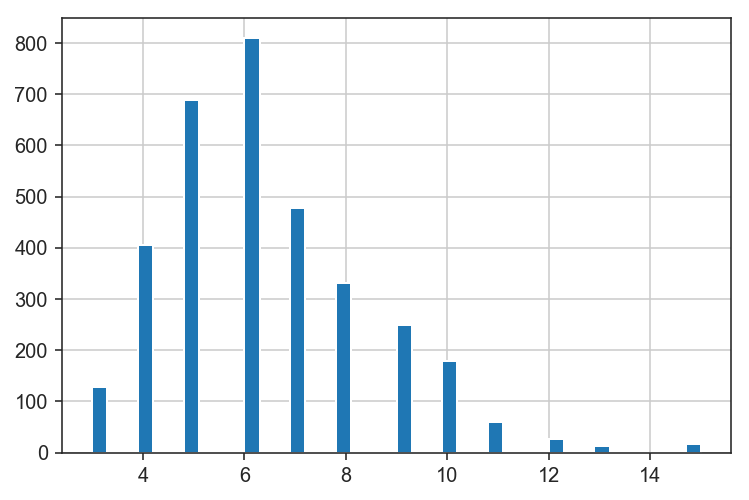

In [33]:
df_cleaned["length"].hist(bins=40)

Mit Vergleichsoperatoren können Zeilenweise vergleiche zwischen Spalten erledigt werden.

Hier überprüfen wir bspw., ob die Versuchsperson die richtigen Antworttaste gewählt hat.

In [34]:
iscorrect = df_cleaned["correct_key"] == df_cleaned["button"]
iscorrect

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8       False
9        True
10       True
11      False
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24      False
25       True
26       True
27       True
28       True
29       True
        ...  
3401     True
3402     True
3403     True
3404     True
3405     True
3406     True
3407     True
3408     True
3409     True
3410     True
3411     True
3412     True
3413     True
3414     True
3415     True
3416     True
3417    False
3418     True
3419     True
3420     True
3421     True
3422     True
3423     True
3424    False
3425     True
3426     True
3427     True
3428     True
3429     True
3430     True
Length: 3383, dtype: bool

In [35]:
df_cleaned["iscorrect"] = iscorrect

Weil `True` und `False` 0 und 1 entsprechen, können wir so sehr leicht die durchschnittliche Akkuratheit berechnen ...

In [36]:
df_cleaned["iscorrect"].mean()  # 93 Prozent

0.9382205143363879

Seaborn schließlich bietet uns Möglichkeiten, mit wenig Aufwand komplexe Visualisierungen darzustellen. Hier beispielsweise berechnen wir die Abhängigkeit zwischen "length" und "rt" für `df_cleaned`.

/Users/jona/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


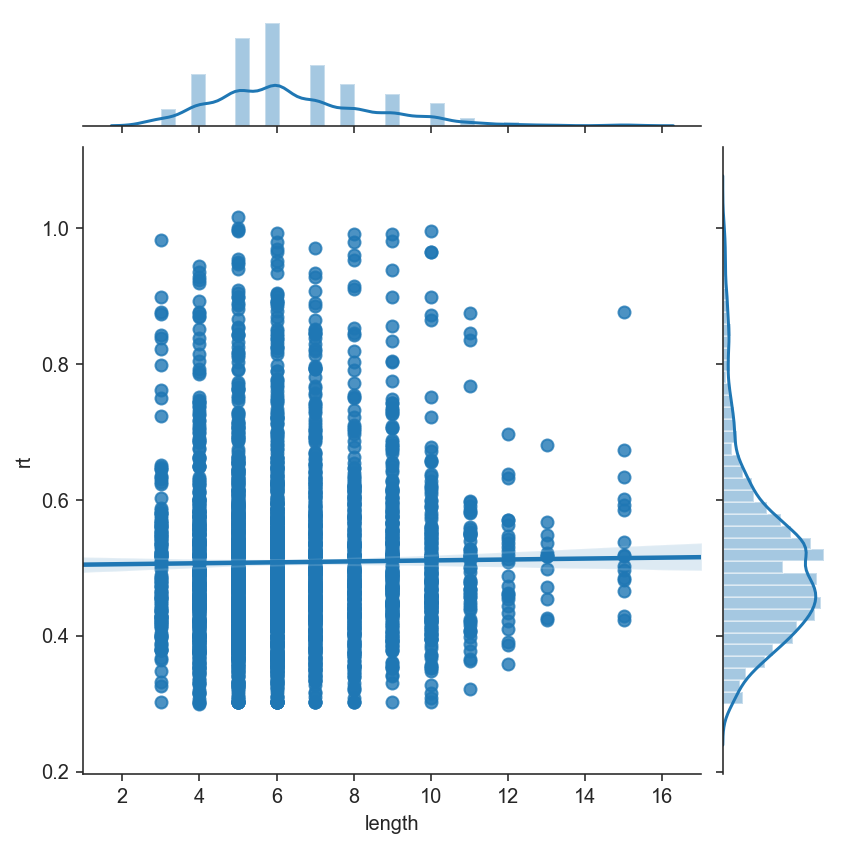

In [37]:
sns.jointplot("length", "rt", df_cleaned, kind='reg')

# Hausaufgaben

- Überprüfen Sie, ob die durchschnittl. Reaktionszeit für falsch beantwortete Trials numerisch größer ist als für richtig beantwortete. Sie können (müssen aber nicht) dafür zwei Subsets erzeugen.

In [ ]:
df_correct = df_cleaned.query(" ...
df_incorrect = ...

df_incorrect["rt"].mean() ...

In [ ]:
diff = ...
print("Richtig beantwortete Trials sind um {}s langsamer als falsch beantwortete.".format(diff))

- Untersuchen Sie, ob es einen Zusammenhang zwischen Wortlänge und Wortfrequenz ("freqs") gibt.

In [ ]:
sns.jointplot(" ...

- **Bonusaufgabe**: Berechnen Sie die Reaktionszeiten der einzelnen Versuchspersonen
- **Bonusaufgabe 2**: Lösen Sie die 1. Aufgabe in nur einer Zeile, ohne das erstellen von Subsets (außer `df_cleaned`).